# Visualisation — Matplotlib and Seaborn Fundamentals
This notebook will introduce the basic functions of matplotlib and seaborn (which is built on matplotlib). The data used is mostly synthetic, with the exception of the wine-dataset used in one part (imported from sklearn)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets


In [42]:
# plotting defaults for a presentation
# explore on the first graph how the plot changes when you switch the context to e.g. "paper" or "poster"
sns.set_theme(style='dark', context='paper', palette="rainbow")
plt.rcParams['figure.dpi'] = 300

## Enzyme kinetics

In [43]:
# load generated dataset
enzyme_kinetics_df = pd.read_csv("enzyme_kinetics_df.csv")
enzyme_kinetics_df.head()

,enzyme,replicate,substrate_mM,rate
0,Enzyme_1,1,0.010000,-5.438464
1,Enzyme_1,1,0.050000,NaN
2,Enzyme_1,1,0.772727,28.823510
3,Enzyme_1,1,0.918182,29.049695
4,Enzyme_1,1,1.495455,42.965803


### Plot: scatter + mean line with confidence band
Axes labels, units, legend, error band (seaborn lineplot `errorbar`).

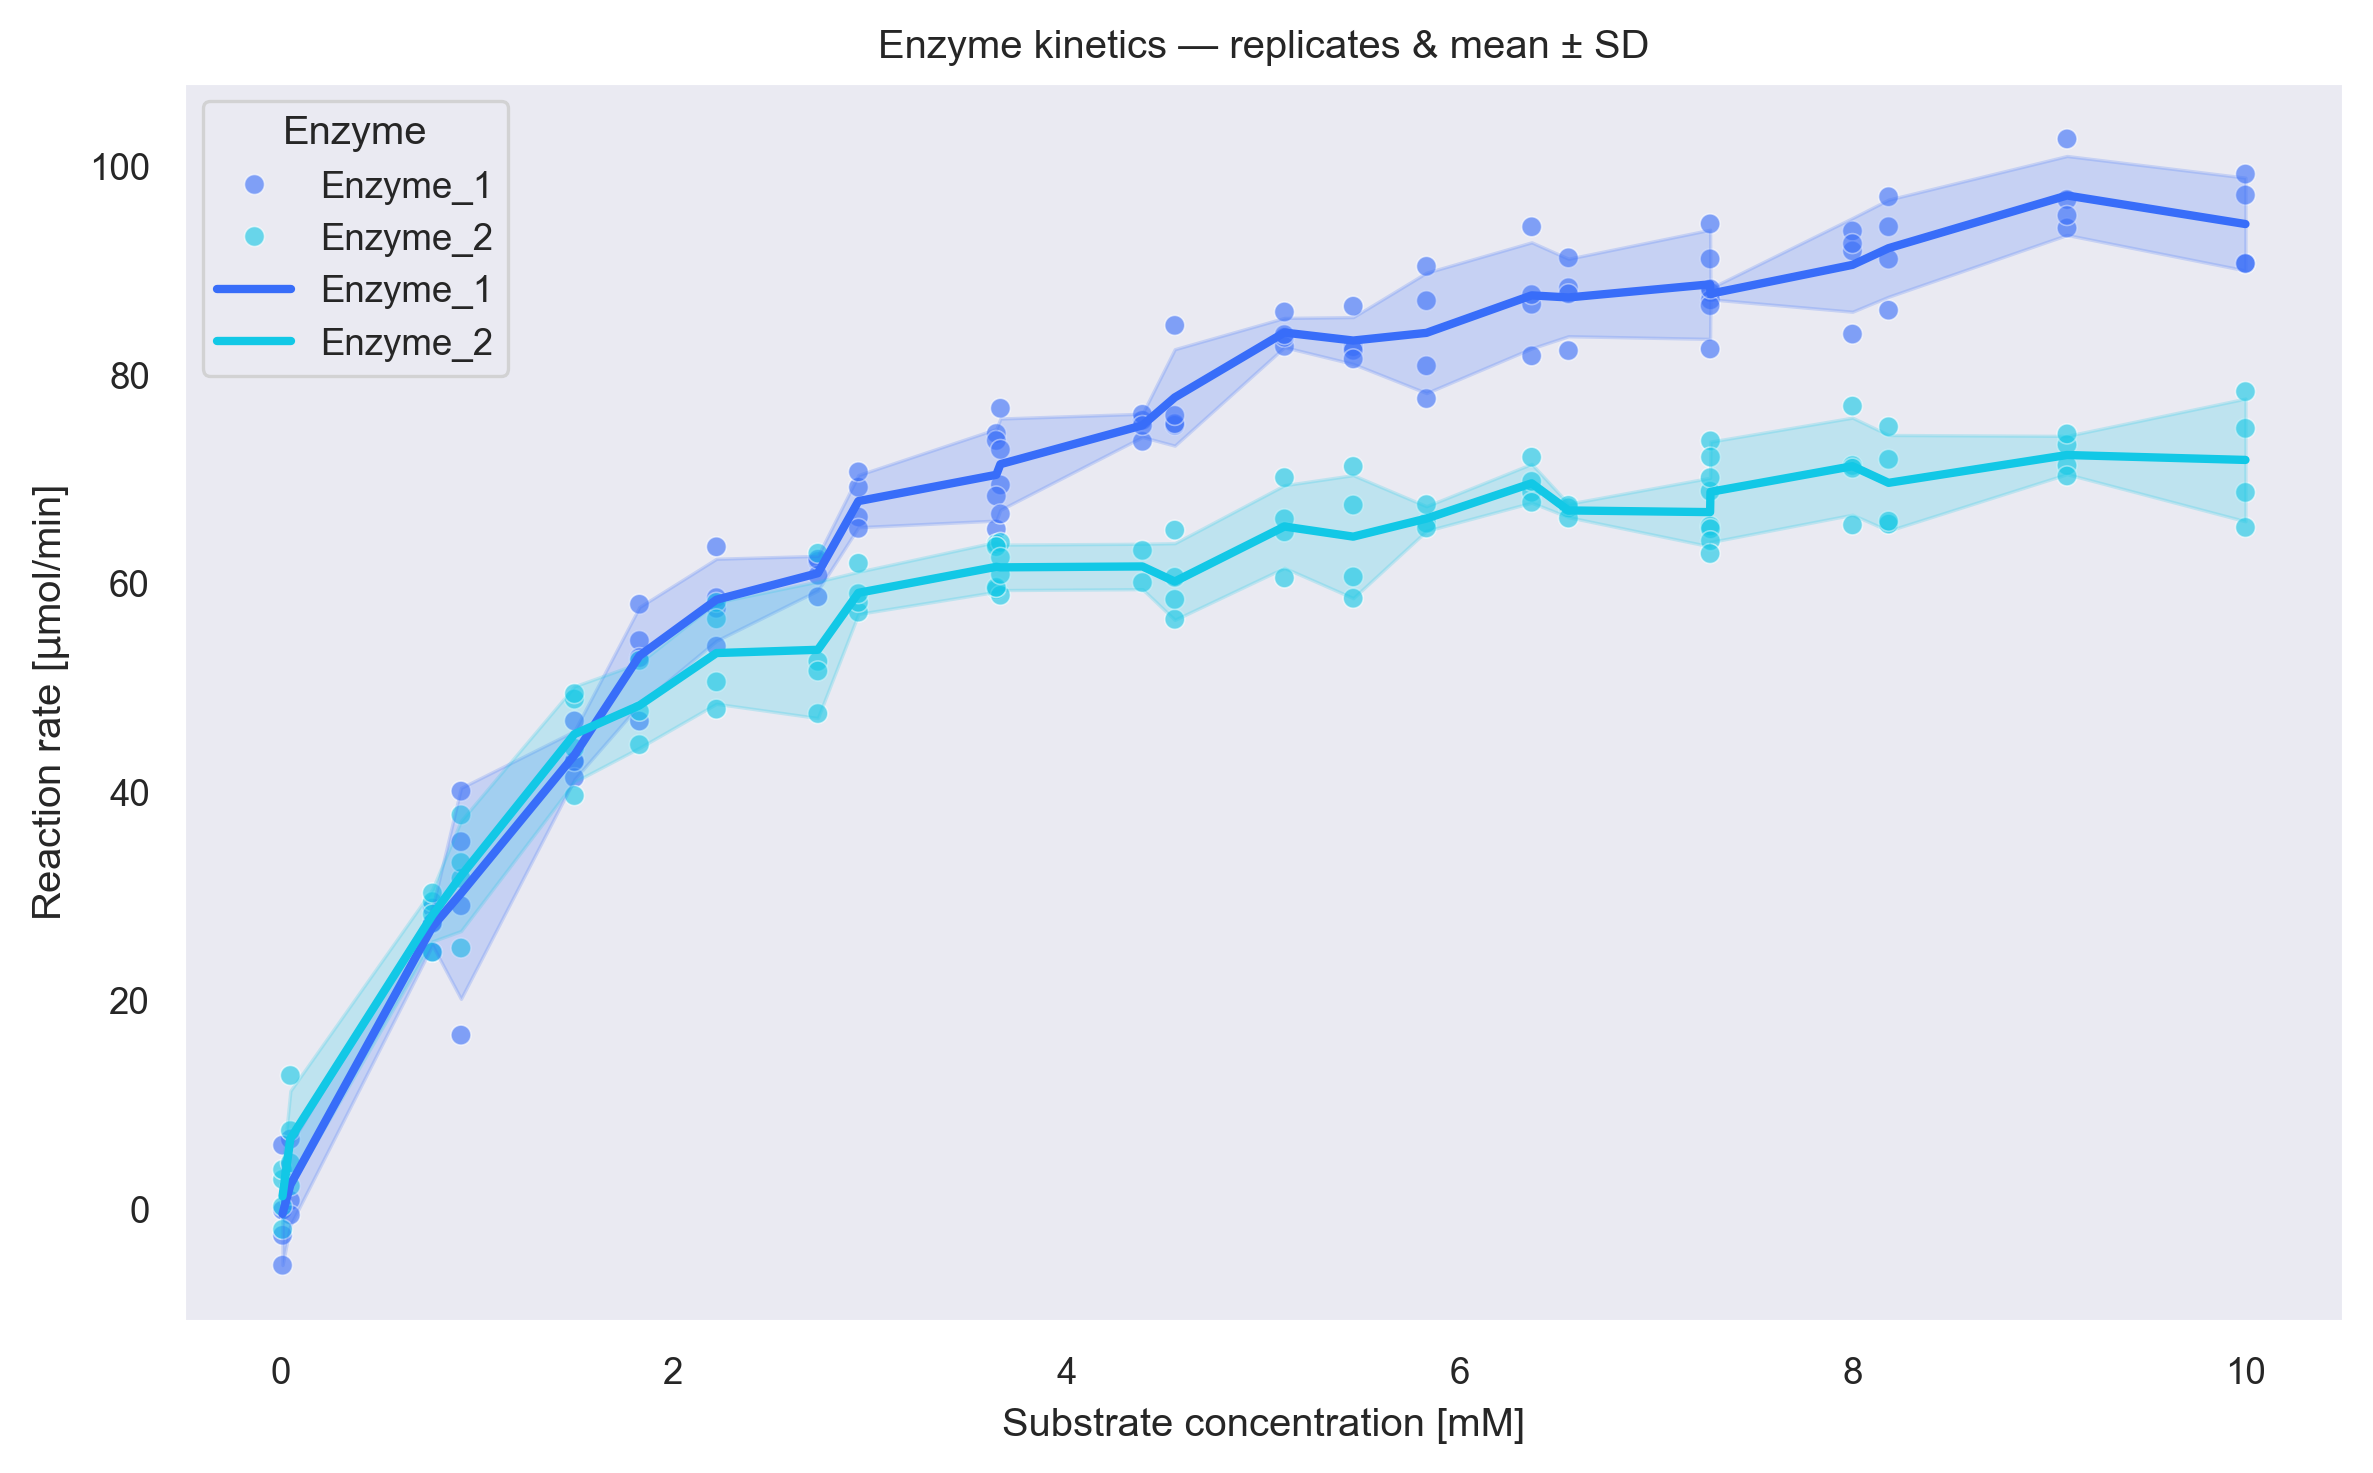

In [44]:
# Scatter + mean trend with uncertainty - 2 plots in one canvas
plt.figure(figsize=(8,5))
sns.scatterplot(data=enzyme_kinetics_df, x='substrate_mM', y='rate', hue='enzyme', alpha=0.6)
sns.lineplot(data=enzyme_kinetics_df, x='substrate_mM', y='rate', hue='enzyme', estimator='mean', errorbar='sd', lw=2)
plt.xscale('linear')
plt.xlabel('Substrate concentration [mM]')
plt.ylabel(r'Reaction rate [$\mathrm{\mu}$mol/min]')
plt.title('Enzyme kinetics — replicates & mean ± SD')
plt.legend(title='Enzyme')
plt.tight_layout()
plt.show()


#### TASK 1
- Play with different settings in the plot above to explore the different parameters.
- Apply a colour palette of choice


#### Task 2
- Replot the enzyme kinetics for each enzyme separately using `sns.relplot` with facet columns. You can pretty much use the line plot from above, simply define the column with the categorial value for which you want to separate the plots (keyword: col)
- Try `estimator='median'` and compare the median and mean curves.
- See what happens when you set an `aspect=2` and `height=4`

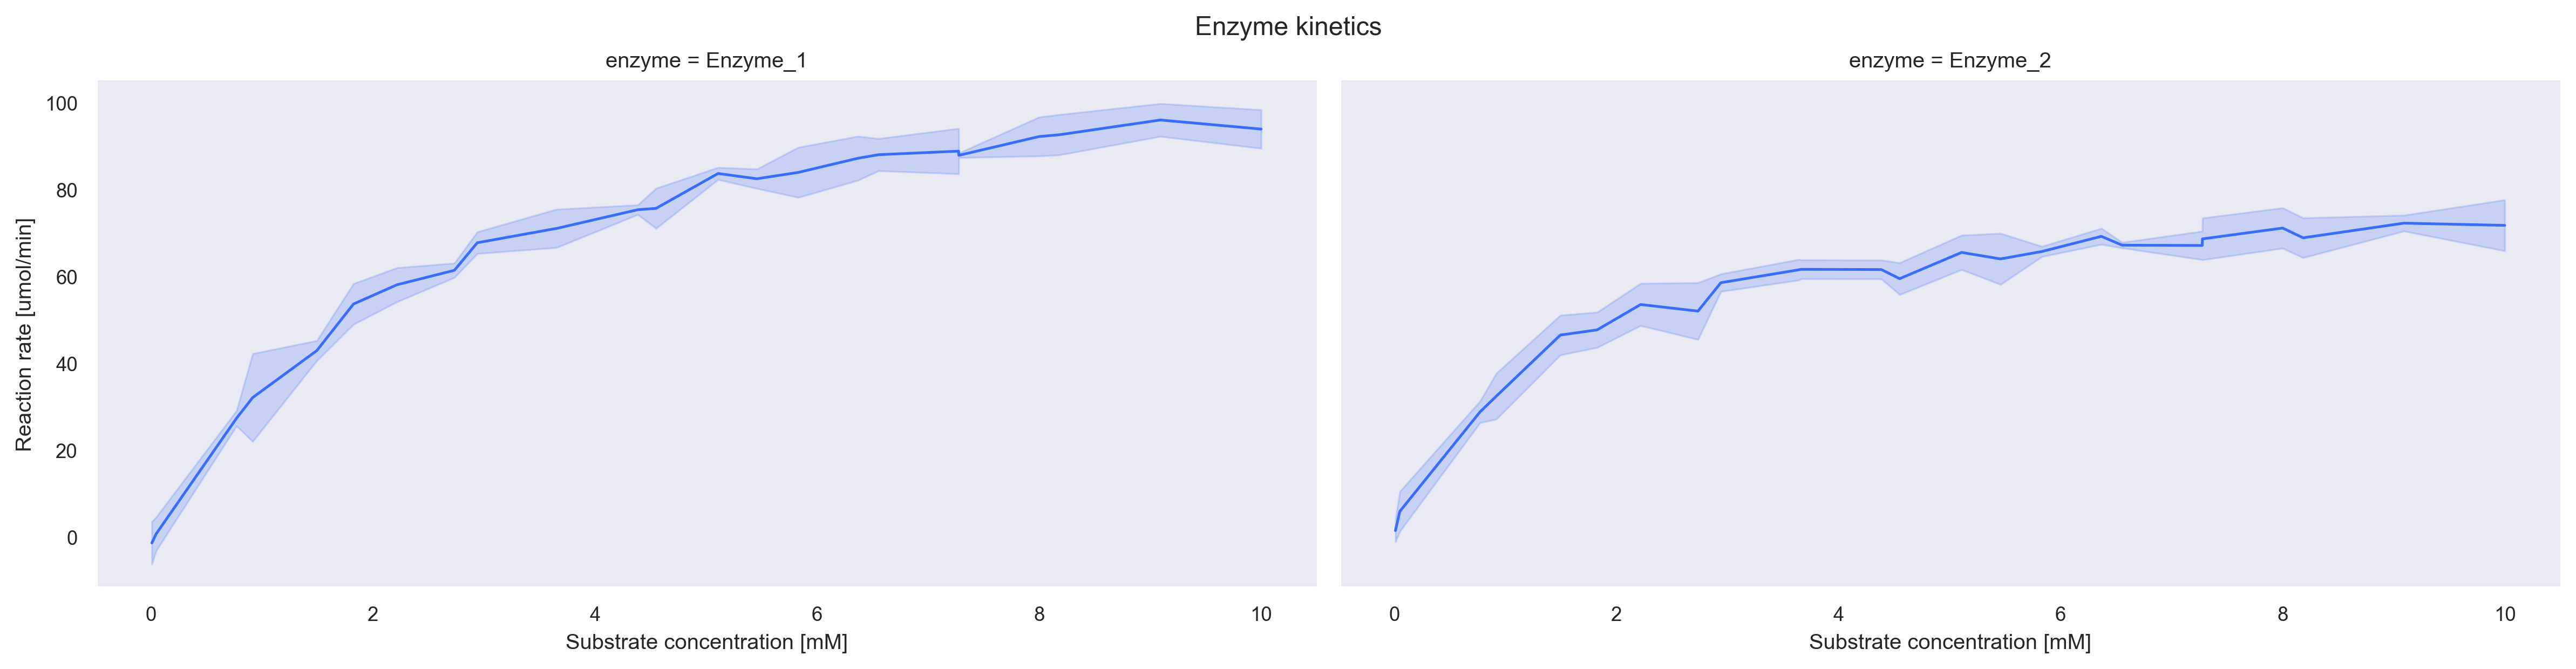

In [56]:
relplot = sns.relplot(data=enzyme_kinetics_df, x='substrate_mM', y='rate',
                col='enzyme', kind='line', estimator='median', errorbar='sd', aspect=2, height=4)
relplot.set_axis_labels('Substrate concentration [mM]', 'Reaction rate [umol/min]')
relplot.figure.suptitle('Enzyme kinetics', y=1.02)
plt.show()

## Protein melting curve

In [57]:
protein_melting_df = pd.read_csv("protein_melting.csv")
protein_melting_df.head()

,protein,replicate,temp_C,fluorescence
0,WT,1,20.000000,16.266044
1,WT,1,22.586207,12.413287
2,WT,1,25.172414,15.946751
3,WT,1,27.758621,18.601542
4,WT,1,30.344828,18.847755


### Plot: multiple replicates (small multiples) and mean curve per protein
Show case for faceting & shaded CI.


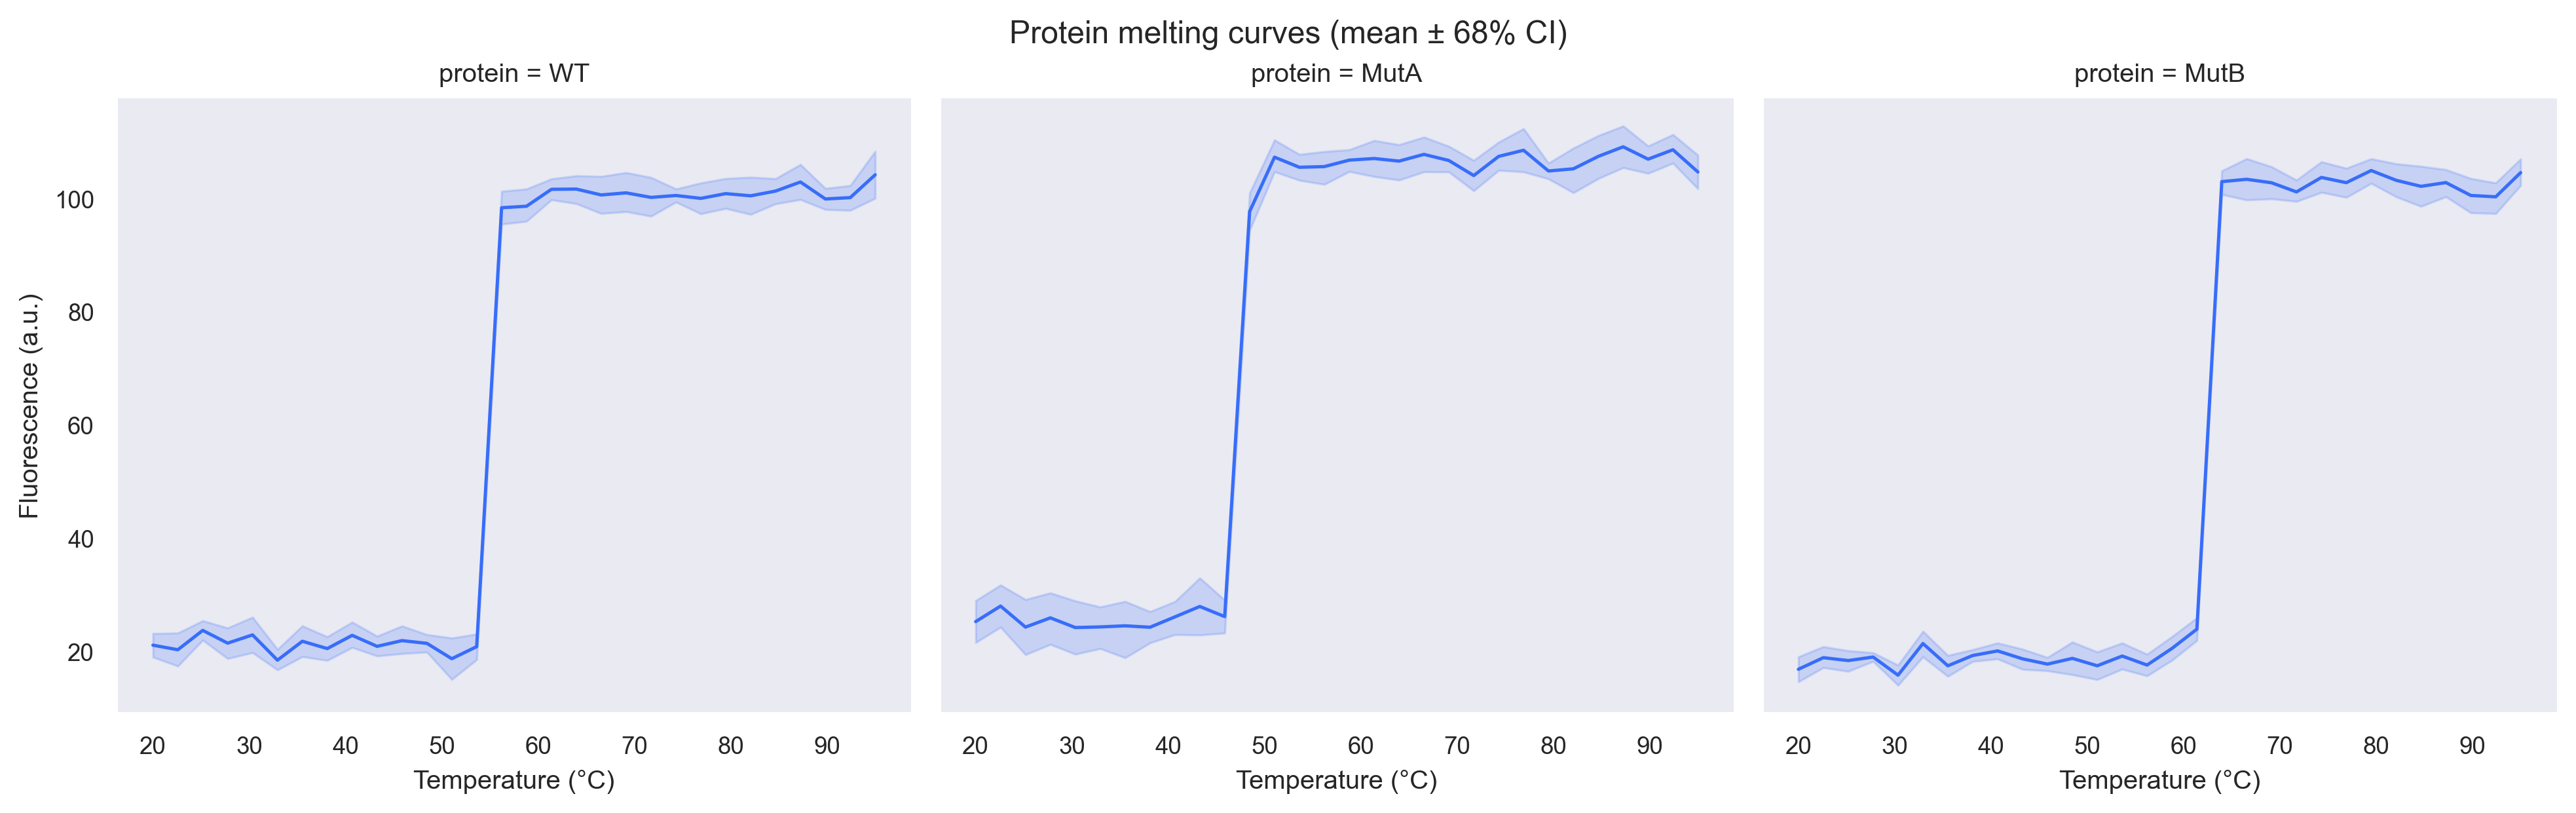

In [61]:
# Faceted line plots with CI
relplot = sns.relplot(data=protein_melting_df, x='temp_C', y='fluorescence',
                col='protein', kind='line', estimator='mean', errorbar=('ci',68), height=4, aspect=1.1)
relplot.set_axis_labels('Temperature (°C)', 'Fluorescence (a.u.)')
relplot.figure.suptitle('Protein melting curves (mean ± 68% CI)', y=1.02)
plt.show()


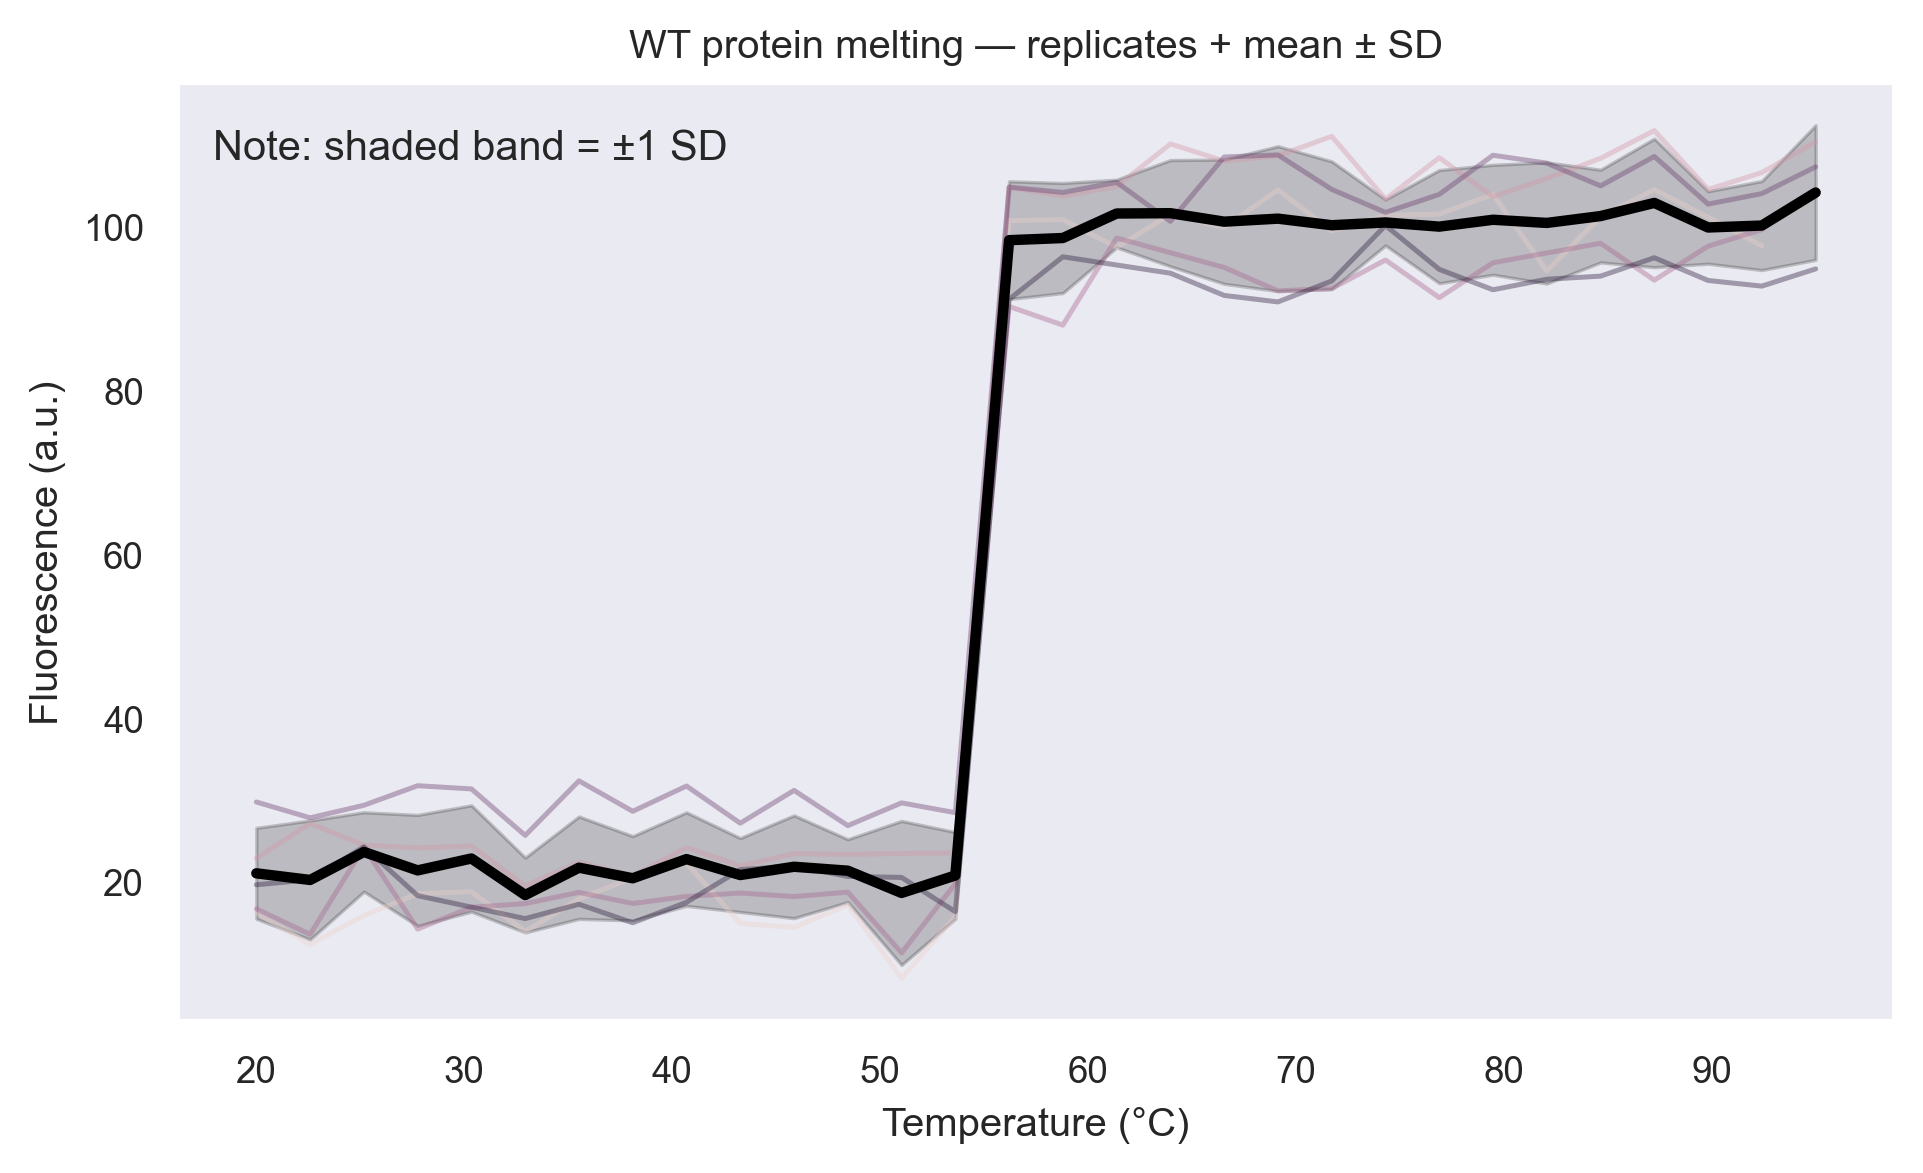

In [64]:
# Example with custom styling and export
fig, ax = plt.subplots(figsize=(6.5,4))
# plot WT melting curves with semi-transparent replicates
subset = protein_melting_df[protein_melting_df['protein'] == 'WT']
sns.lineplot(data=subset, x='temp_C', y='fluorescence', hue='replicate', estimator=None, alpha=0.4, legend=False, ax=ax)
# overlay mean curve
sns.lineplot(data=subset, x='temp_C', y='fluorescence', estimator='mean', errorbar='sd', lw=2.5, ax=ax, color='black')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Fluorescence (a.u.)')
ax.set_title('WT protein melting — replicates + mean ± SD')
ax.text(0.02, 0.95, 'Note: shaded band = ±1 SD', transform=ax.transAxes, fontsize=10, va='top')
fig.tight_layout()
plt.savefig("protein_melting.pdf", dpi=300, bbox_inches="tight")
plt.savefig("protein_melting.svg", dpi=300, bbox_inches="tight")
plt.savefig("protein_melting.png", bbox_inches="tight")
plt.show()


#### TASK 3
- Export the figure as PDF, SVG and PNG. Use the matplotlib function `savefig("name.format", dpi= x, bbox_inches="tight")`, and make sure to insert it befor the plot is shown.
- Compare file sizes and discuss when to use vector (SVG/PDF) vs raster (PNG).

## Distribution plots & comparisons
Boxplot vs violin vs histogram — how to choose. We are going to use the wine dataset for this part.


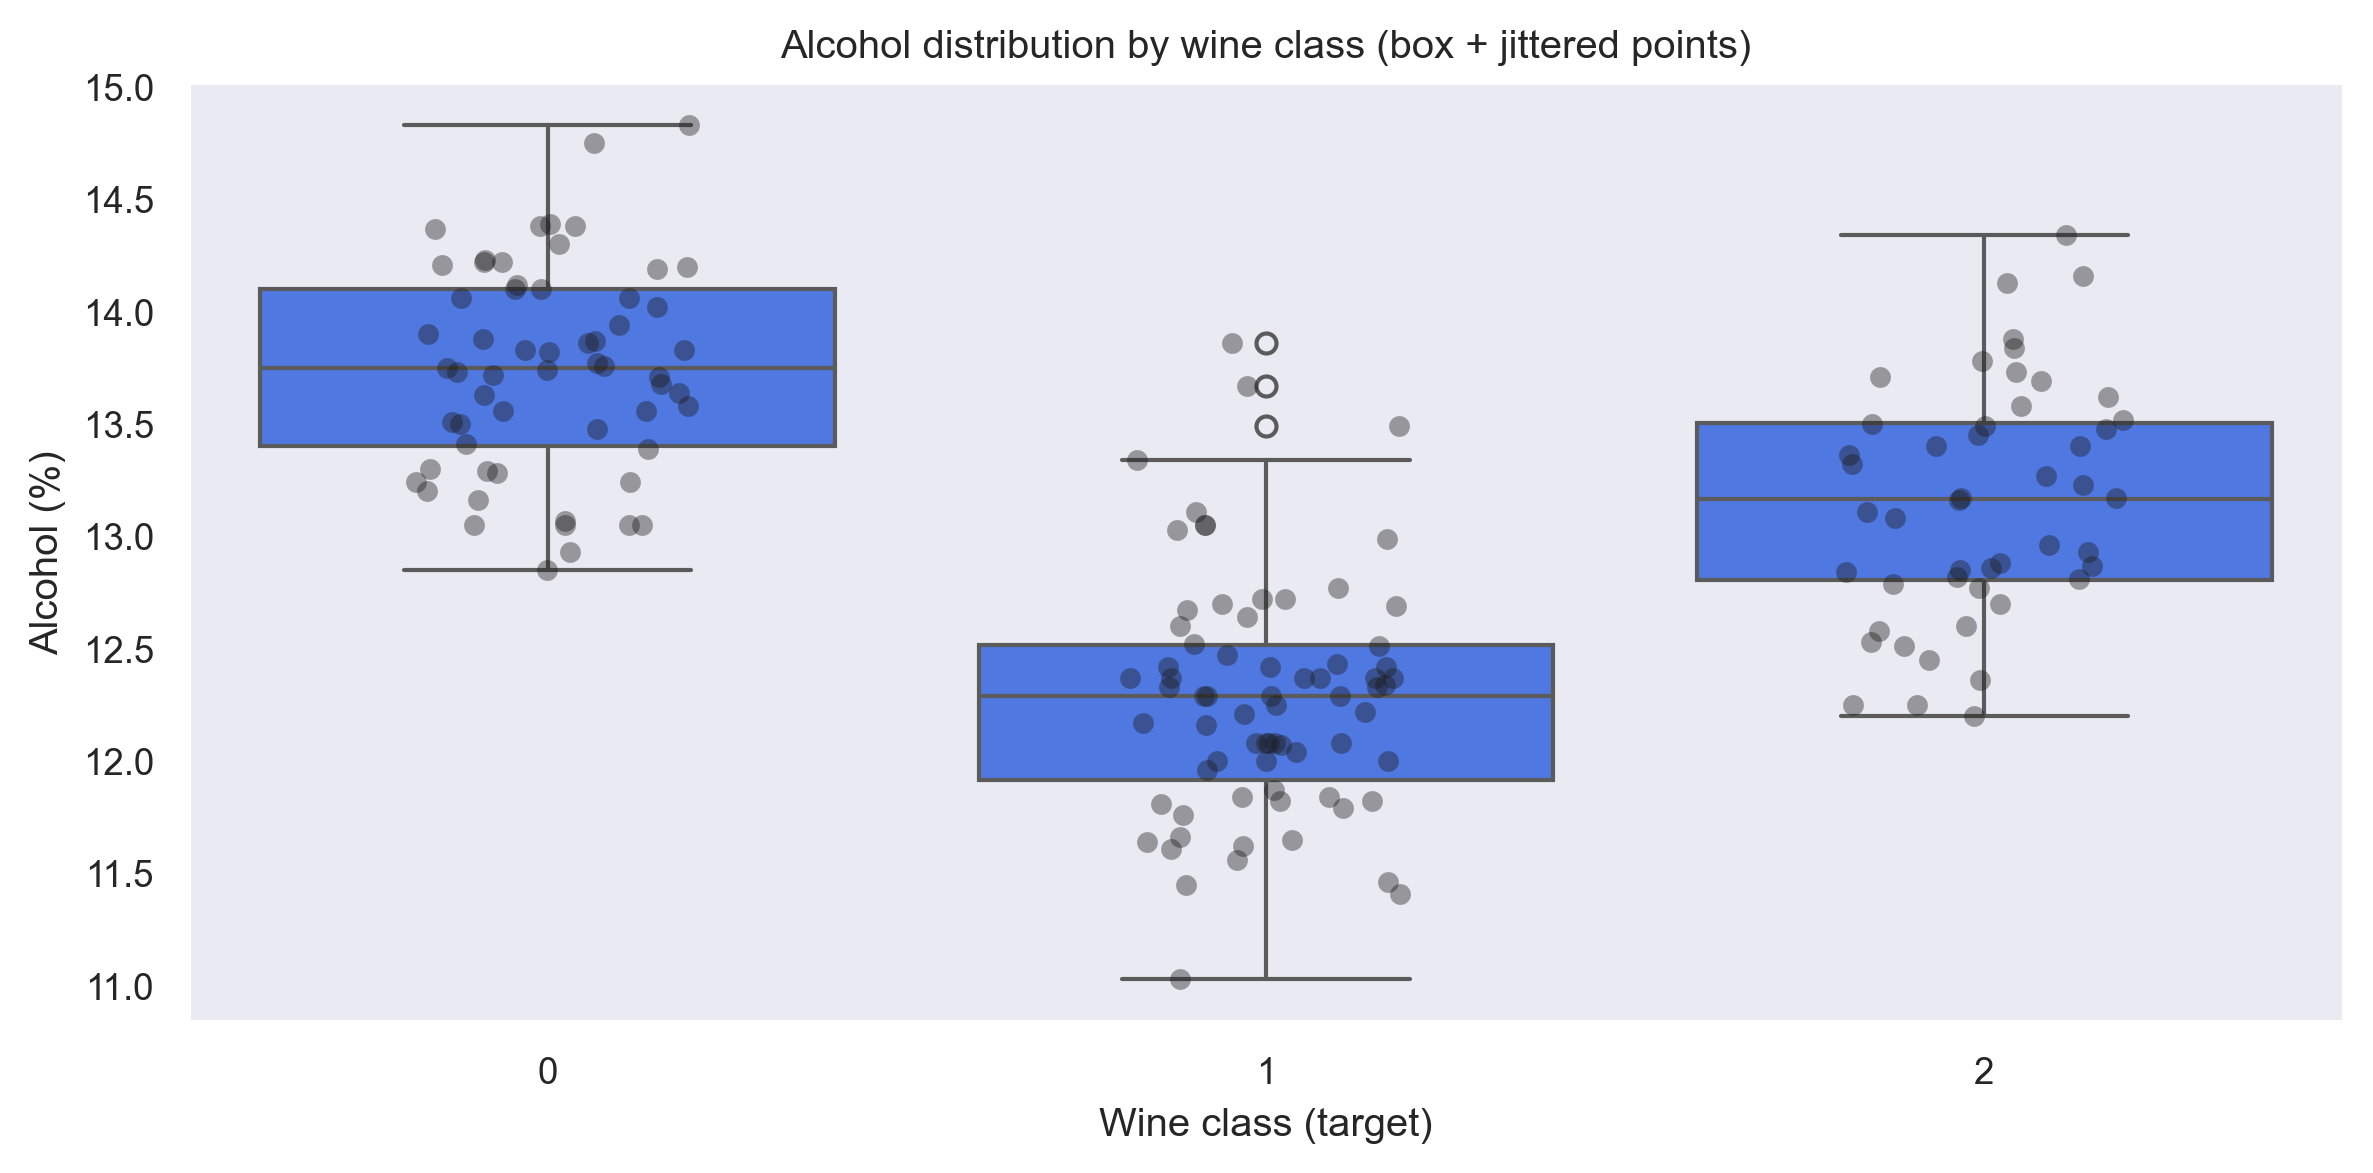

In [67]:
# Distribution comparisons using wine dataset
wine = datasets.load_wine(as_frame=True)
wine_df = wine.frame
wine_df['target'] = wine_df['target'].astype('category')  # convert to categorical

# Quick example: compare 'alcohol' distribution by class
plt.figure(figsize=(8,4))
sns.boxplot(data=wine_df, x='target', y='alcohol')
sns.stripplot(data=wine_df, x='target', y='alcohol', color='k', alpha=0.4, jitter=0.2)
plt.xlabel('Wine class (target)')
plt.ylabel('Alcohol (%)')
plt.title('Alcohol distribution by wine class (box + jittered points)')
plt.tight_layout()
plt.show()


#### TASK 4
- Recreate the same comparison using `sns.violinplot`. Which visual conveys sample skew or multimodality better?
- For `alcohol`, produce a histogram including a KDE (kernel density estimate). Explore different bandwidths for the kde (`bw_adjust=x`, try values from 0.1 to 2). You can put them in a subplot next to the histogram as a `sns.kdeplot`. Discuss the effect. When might a lower and higher bandwidth be aplicable?


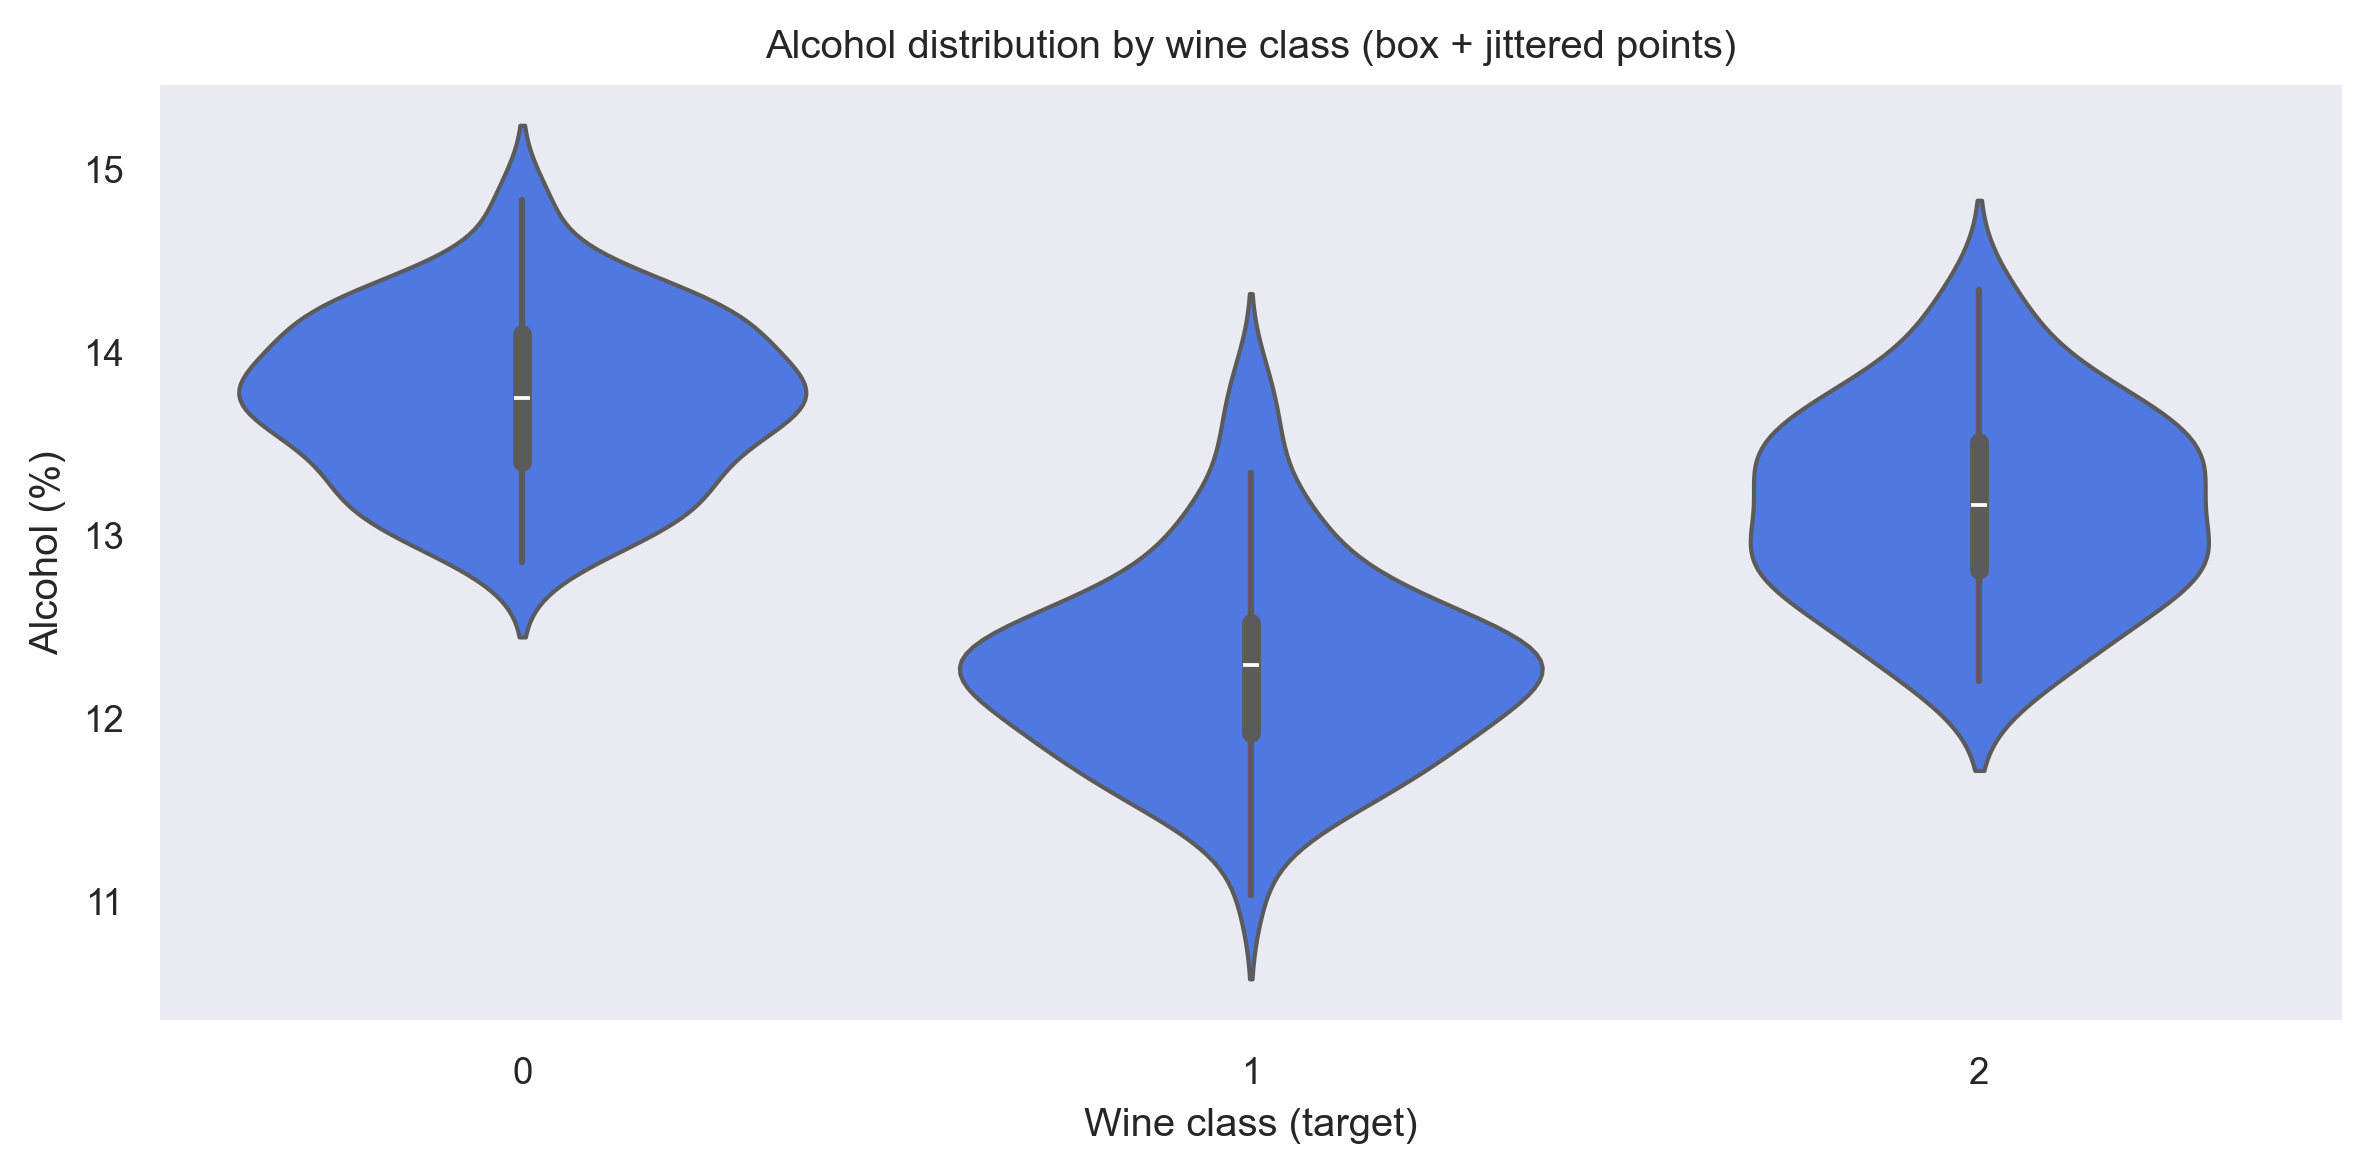

In [68]:
# Distribution comparisons using wine dataset
wine = datasets.load_wine(as_frame=True)
wine_df = wine.frame
wine_df['target'] = wine_df['target'].astype('category')  # convert to categorical

# Quick example: compare 'alcohol' distribution by class
plt.figure(figsize=(8,4))
sns.violinplot(data=wine_df, x='target', y='alcohol')
#sns.stripplot(data=wine_df, x='target', y='alcohol', color='k', alpha=0.4, jitter=0.2)
plt.xlabel('Wine class (target)')
plt.ylabel('Alcohol (%)')
plt.title('Alcohol distribution by wine class (box + jittered points)')
plt.tight_layout()
plt.show()

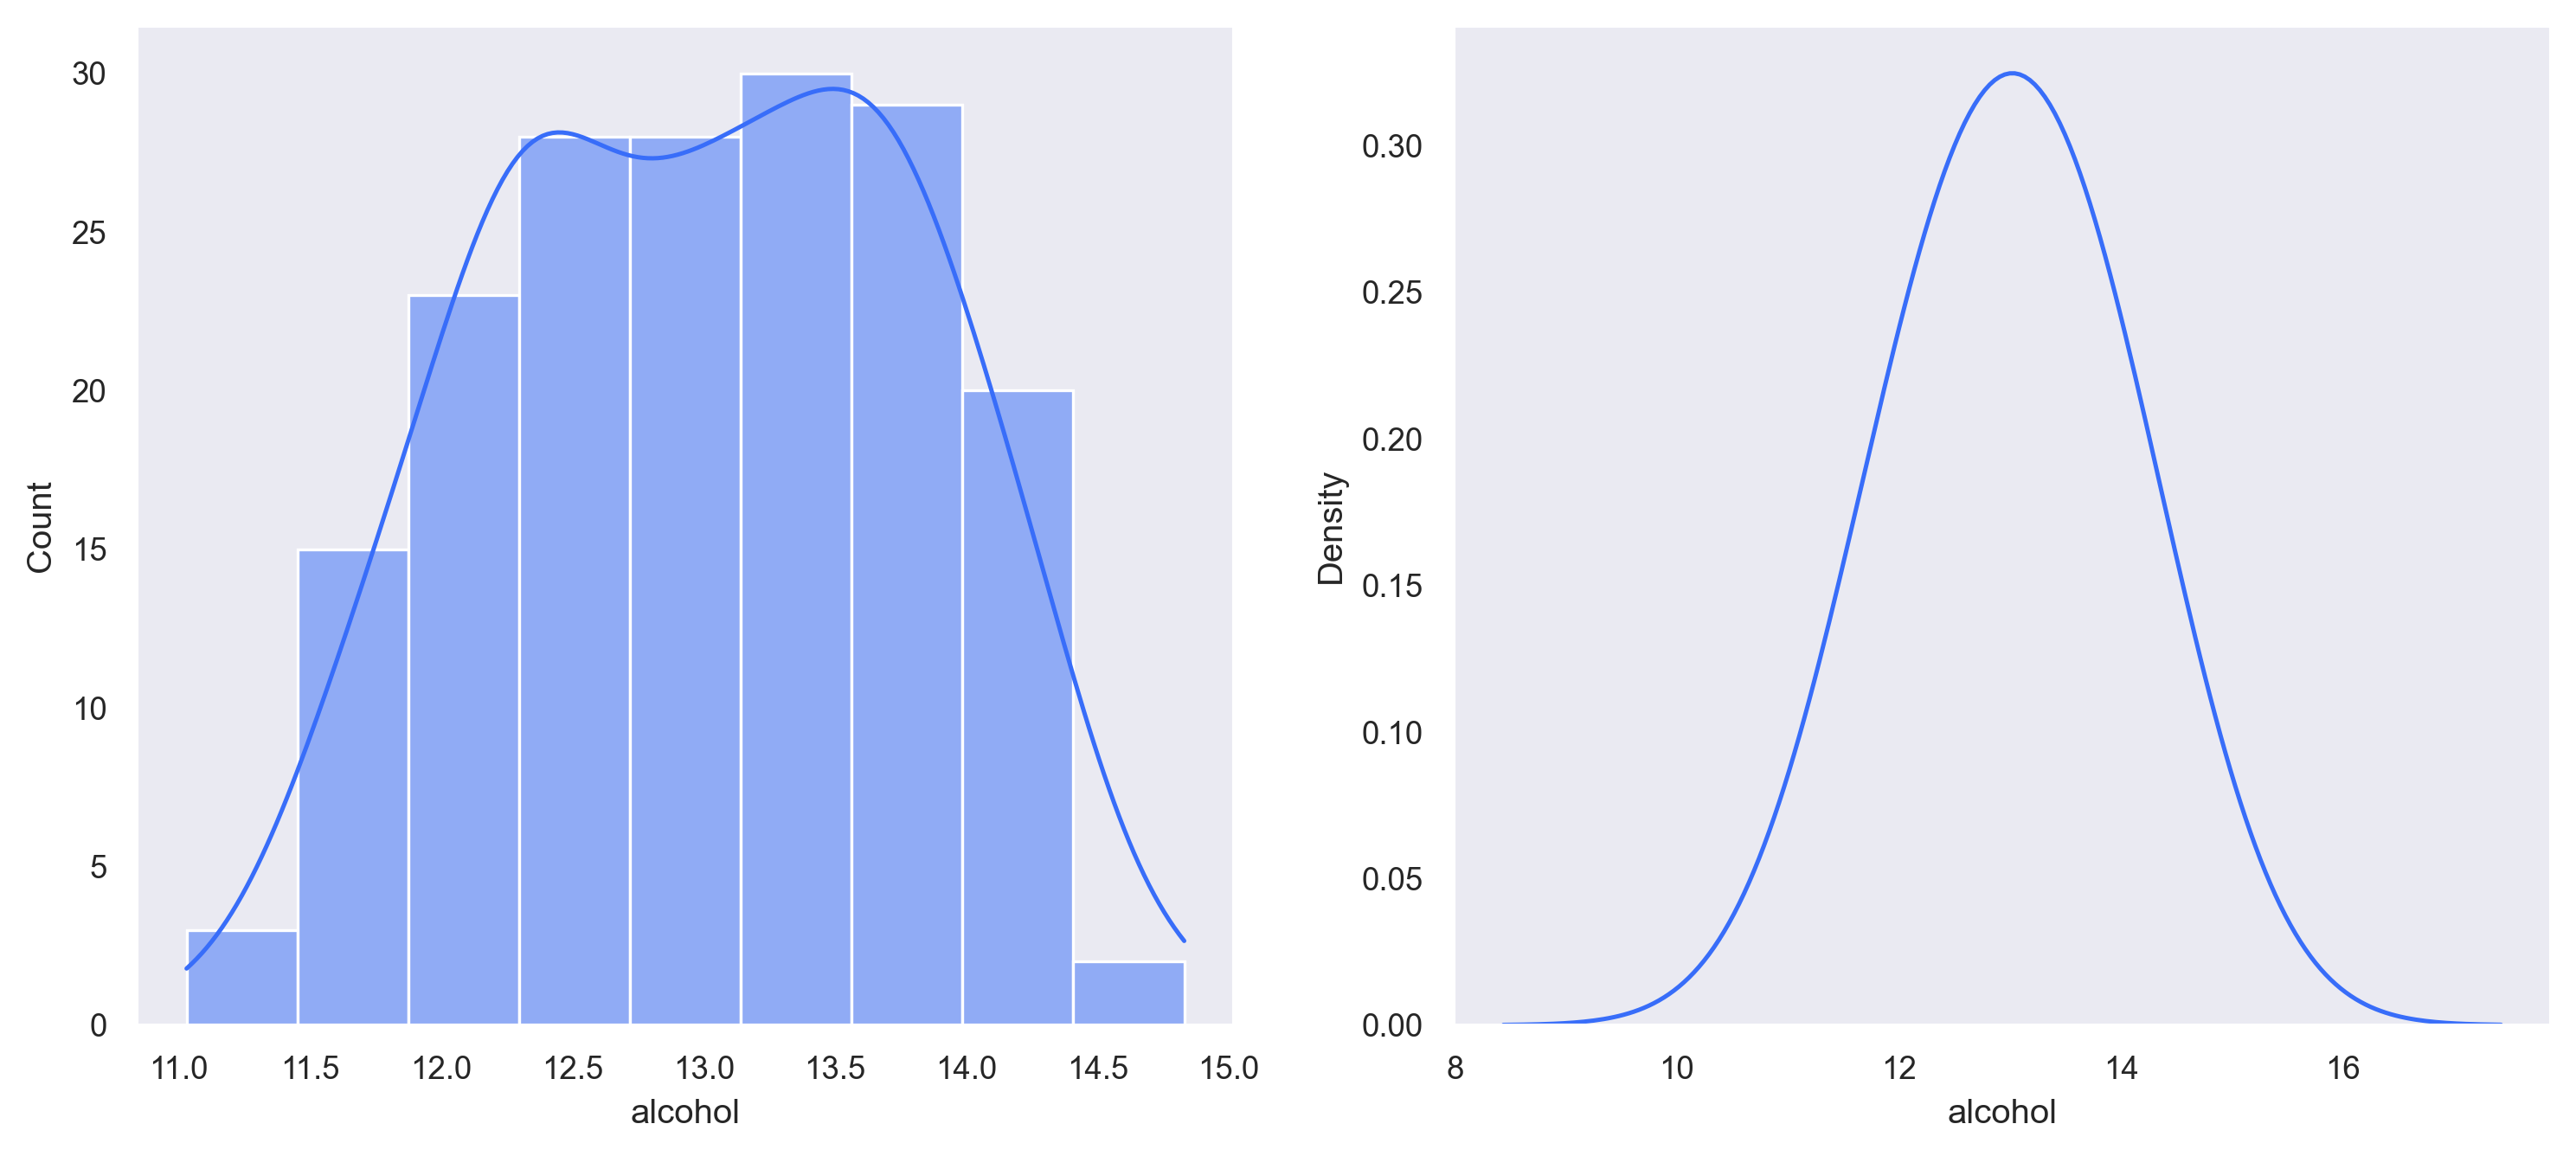

In [71]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(wine_df.alcohol, kde=True, ax=ax[0])
sns.kdeplot(wine_df.alcohol, bw_adjust=3, ax=ax[1])
plt.show()

#### TASK 5
- Select a feature from the wine dataset and create a scatterplot. Use `viridis`, `cividis`, or `sns.color_palette("colorblind")` for accessible palettes.
- Avoid rainbow colormaps for continuous quantitative scales.
- Create a heatmap using the snippet below and choose an appropriate colourmap.

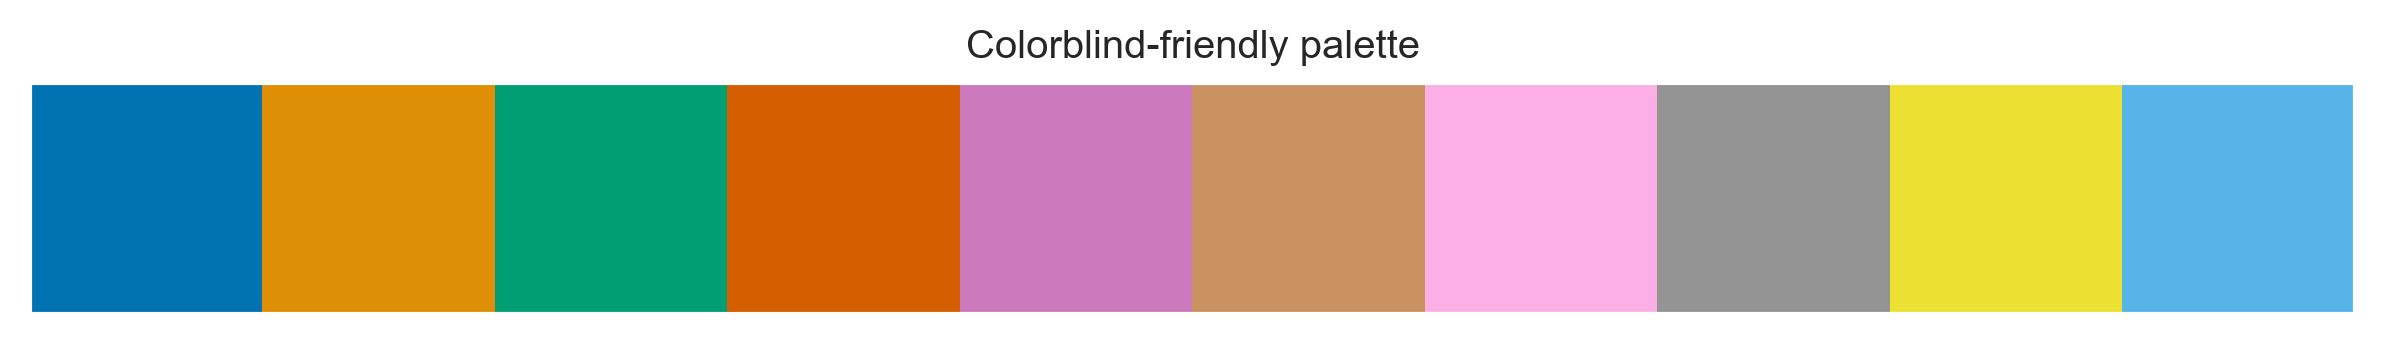

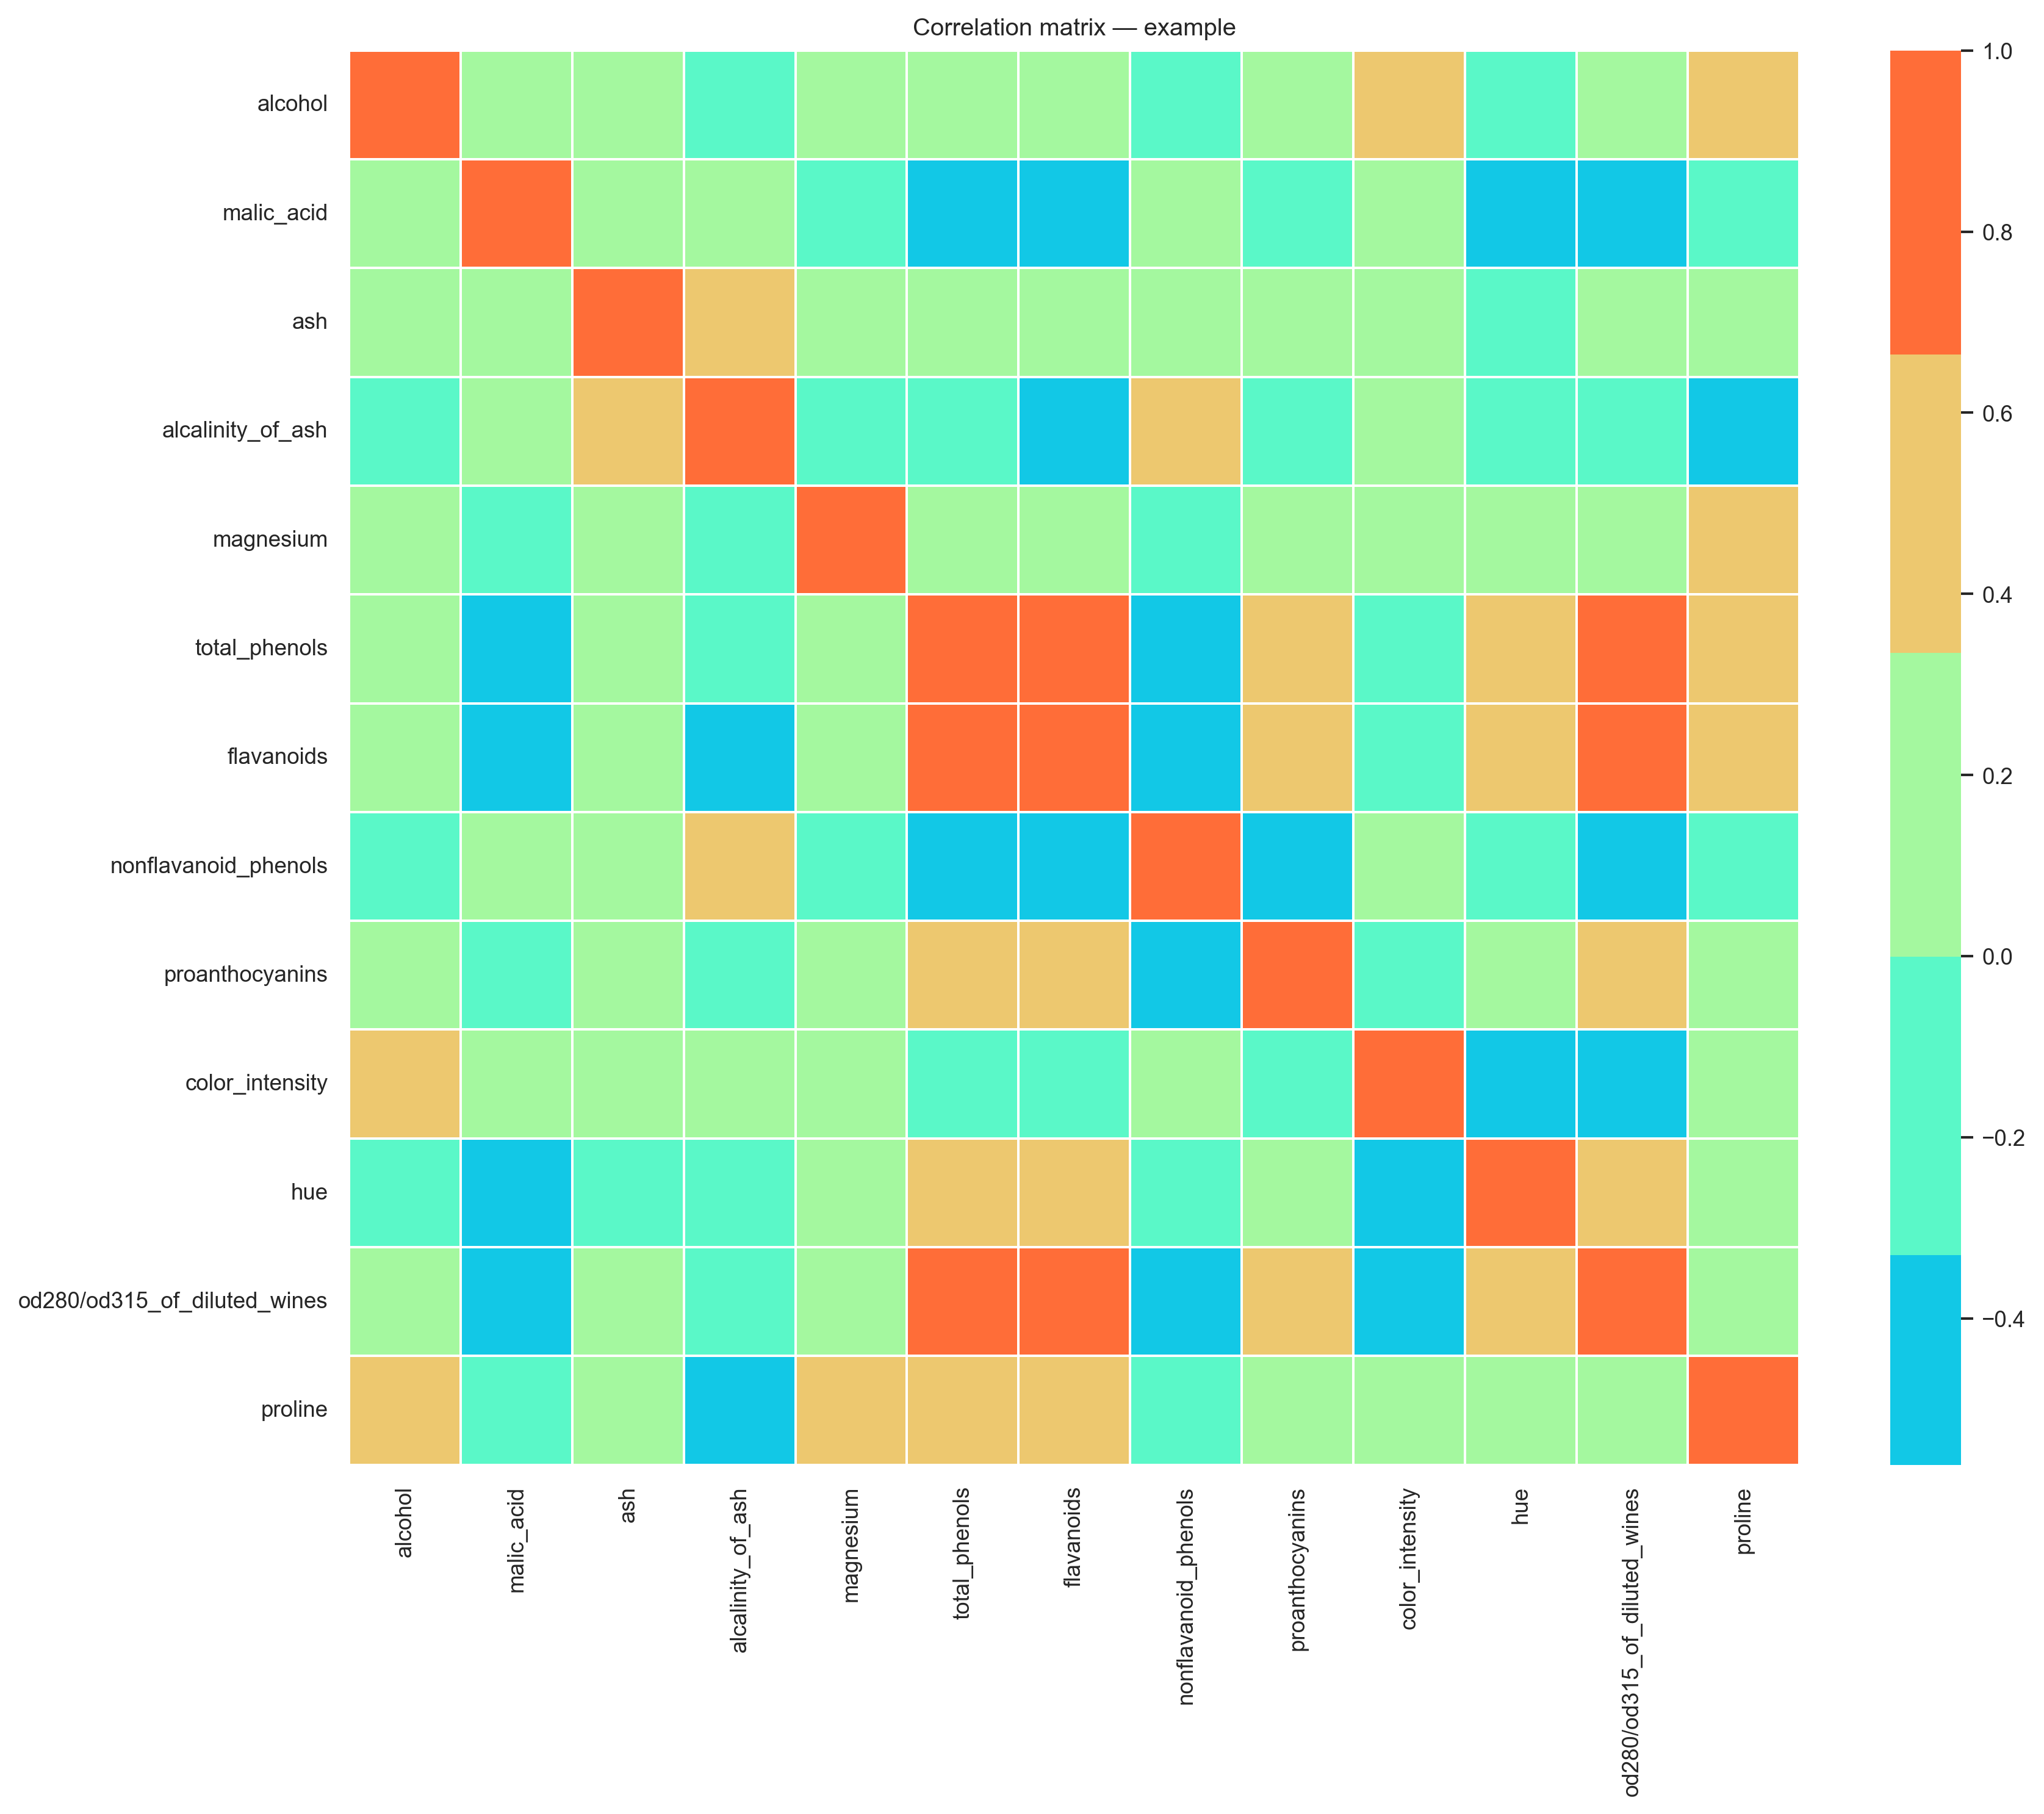

In [69]:
#Color palette examples
pal = sns.color_palette("colorblind")
sns.palplot(pal)
plt.title('Colorblind-friendly palette')
plt.show()



# Example: choose sequential colormap for heatmap
sample_corr = wine_df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12,10))

# define a colourmap
colourmap = sns.color_palette()

sns.heatmap(sample_corr, cmap=colourmap, center=0, linewidths=0.5)
plt.title('Correlation matrix — example')
plt.tight_layout()
plt.show()


## Final short exercise and wrap-up
Use the scatterplot from above and apply:
- good labels (axis, title, etc.) and units
- accessible colors

Additionally, think of a short caption (1–2 sentences) explaining what the plot shows
